# Logistic Regression

# Description
Logistic Regression is a core
supervised learning technique for solving classification problems and is commonly used by many data scientists and statisticians. It models the probabilities for a classification model and ouputs categorical prediction, like for example if a patient will pass an exam or not as {1, 0} or {True, False}.



### Classification problem

In a classification problem, the target values are called labels. Each label corresponds to a certain class such as “car”, “blue” or “malignant.” Each instance belongs to a certain class, thus having a label. Both the labels and classes have to be unique, but more than one instance per class is allowed. Usually each class’ label has an integer value starting at 0 and following classes get a label of 1, 2, 3, etc. This gives us the property that $ y^{(i)} \in \{0, 1, ..., \boldsymbol K\}$ where $ \boldsymbol K$ is the number of classes.

Here we will focus on the binary classification where K = 2. 0-classes are the negatives (absence) and 1 (Presence) are the positives ones.

Another way to look at this is that for negatives there is a  $0\%$ chance of something occurring where for positives there’s a  $100\%$ chance. These percentages will, hopefully, be the output of a logistic regression model.

# Modelling

In here we need a way to map input values to output values. Note that in a linear regression model, the hypothesis is defined as $h_\theta(x) = \theta^Tx$, where $\theta$ is the parameter of the model. It can output values much greater than 1 and much smaller than 0. In contrast, in the logistic regression setting we would like to get values between 0 and 1. In other words, we want $h_\theta(x)$ to be in the interval $[0, 1]$, so we can interpret the output as probabilities. To achieve this, we use the sigmoid function:
$\sigma(z) = \frac {1}{1 + e^{(-z)}}$

It is easy to see why it's used when you look at its graph:
 <img src="main-qimg-6b67bea3311c3429bfb34b6b1737fe0c.jpeg">



For values $x < 0 $ we have that $ \sigma(x) > 0.5$ and for $ x < 0$ we have $ \sigma(x) > 0.5$. 
In Python we can define the sigmoid function as below.




In [83]:
def sigmoid(z):
    """ sigmoid """
    return 1.0 / (1.0 + np.exp(-z))

### Hypothesis

In order to output probabilities, our hypothesis will be defined as $h_\theta (x) = \sigma(\theta^Tx)$ where $\sigma(\theta^Tx) = \frac {1}{1 + e^{(-\theta^Tx)}}$

We have now a model that outputs probabilities of an example belonging to the positive class, or $P(y = 1|x;\theta)$ in mathematical terms. For negative classes we have $P(y = 0|x;\theta) = 1 - P(y = 1|x;\theta)$.

During training we will modify the values of $\theta$ to yield high values for ${\theta^Tx}$ when $x$ is a positive example, and vice versa.

In [84]:
#Hypothesis function
def h(X, theta):
    '''args:
            X: (N,M) features matrix
            theta:(M, D) vector of parameters
        return:
                h(theta.X)'''
    return sigmoid(X @ theta)

### Decision boundary
To make a final decision about which class a certain example  belongs to we define a certain threshold. If  $h$ exceeds that threshold we predict $1$, otherwise $0$. We most normally use $0.5$, we are more than  $50\%$ sure something will happen, but it depends on the context.

The decision boundary is then a n-1 dimensional surface that divides the features space in two.  If you cross that surface the prediction about your class will change. The further you move away from the decision boundary the more certain you are about belonging to the class you’re in

## The loss function

The loss function will allow us to minimize the error made while predicting a sample.

Let's look at the mean squared error loss function:
$
J(\theta) = \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$

It can be used to optimize the euclidean distance between a prediction and the target. While using this function would work with logistic regression, it turns out that it’s very hard to optimize with an optimization algorithm like gradient descent. The reason for this is because the loss function is very non-convex as a result of the nonlinearity of $\sigma$. In other words, we have more than one minimum and we’re not sure whether a certain minimum is the best fit for our model.
That’s the reason we use another loss function:

$J(\theta) = \begin{cases} -log(1 - h_\theta(x)), & \mbox{if } y = 0 \\ -log(h_\theta(x)), & \mbox{if } y = 1 \end{cases}$

Let’s break that down by looking at a few examples. Suppose we have the label $y^{(i)}$ and the prediction $h_\theta(x^{(i)})$:

if $y^{(i)} = h_\theta(x^{(i)} = 0$ we have a loss of 
$-log(1 - h_\theta(x)) = -log(1 - 0) = -log1 = 0$

if $y^{(i)} = h_\theta(x^{(i)} = 1$ we have a loss of $-log(h_\theta(x)) = -log1 = 0$

if $y^{(i)} = 0$ but $h_\theta(x^{(i)} = 1$ we have a loss of $-log(1 - h_\theta(x)) = -log(1 - 1) = -log 0 = \infty$

if $y^{(i)} = 1$ but $h_\theta(x^{(i)}) = 1$ we have a loss of 
$-log(h_\theta(x)) = -log 0 = \infty$

As the model moves closer to the wrong prediction, the loss gets progressively higher. Let’s look at the loss of the sigmoid function $\sigma$ with respect to $z$ 
 <img src="sigmoid_loss.png">
 
For $y = 0$, as $z$ approaches $\infty$, $\sigma (z)$ approaches $0$ so the loss approaches $1$ as well.

For $y = 1$, as $z$ approaches $-\infty$, $\sigma (z)$ approaches $0$ so the loss approaches $0$ as well.

Another way to understand this is that this loss function pushes the model to be very sure about its predictions. The model will always be penalized, even it if it predicts the correct class, except when it has 100% certainty. For example, let’s suppose the model is 51% sure ($h(x) = 0.51$) about an example belonging to class 1, thus predicting class 1, it will still have a loss of $-log 0.51 \approx 0.67$.

Because we know that $y^{(i)} \in [0,1] $, there’s a shorter way of writing this function:

$J(\theta) = -\frac{1}{m} \left[\sum_{i=1}^{m}{y^{(i)}logh_\theta(x^{(i)}) + (1 - y^{(i)})log(1 - h_\theta(x^{(i)})}\right]$

In python the cost function can be return as:

In [164]:
def cost_function(pred, y):
    m = len(y)
    ##For numerical stability of the log operation
    r1 = pred
    r2 =  1.0 - pred

    r1 = np.where(r1 > 0.0000000001, r1, -10)
    r1 = np.log(r1, out=r1, where=r1 > 0)

    r2 = np.where(r2 > 0.0000000001, r2, -10)
    r2 = np.log(r2, out=r2, where=r2 > 0)
    #################

    return (1.0/m) * (-y @ r1 - (1.0 - y) @ r2)

Well, when we want to minimize our cost function using gradient descent we will need to compute the derivative of the loss function.

### Derivative
We will use the derivative of the loss function to calculate a gradient descent step.

The vectorized derivative for $J$ is given as:
$\nabla{J(X)} = \frac {1}{m}X^{T}(X\theta - y)$

In [162]:
def compute_gradient(theta, X, y, pred):
    m = X.shape[0]
    gradient = (1.0 / m) * X.T @ (pred - y)
    return gradient

## Update parameters
The objective of logistic regression is to minimize the cost function
$J(\theta) = -\frac{1}{m} \left[\sum_{i=1}^{m}{y^{(i)}logh_\theta(x^{(i)}) + (1 - y^{(i)})log(1 - h_\theta(x^{(i)})}\right]$


where the hypothesis is given by $h_\theta(x) = \sigma (\theta^{T}x)$.

The gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j \in (0,1, ..., n)$) is defined as follows: 
$\frac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{m} (h_\theta(x^i) - y^i)x_j^{(i)}$


One way to update the parameters $\theta_j$ is to use the gradient descent algorithm. In gradient descent, each iteration performs the update: $$ \theta_j =   \theta_j - \alpha \frac {\partial J(\theta)}{ \partial \theta_j}$$

(simultaneously update $\theta_j$ for all j), where $\alpha$ is the learning rate.

With each step of gradient descent, the parameters  come closer to the optimal values that will achieve the lowest cost $J(\theta)$.


# Training Algorithm

During the training, we will need to measure the performance of the mode called Accuracy.
The accuracy is the percentage of examples we correctly predicted the class for.

Implementing this in Python is very easy if we count the number of instances we get correct and divide it by the total number of items. In mathematical terms, that’s equal to the average.

preds = h(X, theta)
((preds > 0.5) == y).mean()

We will also keep track of the loss and accuracy during training.

In [247]:
def Training(X, y, alpha, num_iters):
    
    "Performs gradient descent, updates theta by taking num_iters gradient steps with learning rate alpha"
    '''
    args:
       X: features
       y: target
       alpha: learning rate
       num_iters: Number of iterations
       
    return:
            the parameter theta and a dictionnary containing the loss and accuracy'''
    #Initialize some useful values
    numb_samples = len(y) # number of training examples
    n_features = X.shape[1] #number of features

    history = {'loss':[], 'acc': []} #To accumulate the loss and accuracy
    theta = rand(X.shape[1])
    bias = 0

    for i in range (num_iters):
        pred = h(X, theta) #prediction
        theta = theta - alpha * compute_gradient(theta, X, y, pred) #update

        #loss
        loss = cost_function(pred, y)
        history['loss'].append(loss)

        #accuracy
        acc = ((pred > 0.5) == y).mean()
        history['acc'].append(acc)

        #print stats
        if i % 5 == 0:
            print('Loss: {}, Accuracy: {}'.format(loss, acc))


        
    return history, theta
    

## Logistic Regression on a small score exam dataset

# Data

In this tutorial, we will build a model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
   

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
train_df = pd.read_csv('/content/drive/My Drive/GestuAI/GUestu/ex2data1.csv', sep=',')
train_df.head(5)

,score1,score2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Visualization
Before starting the learning algorithm, let's visualize the data. The code below will display it on a 2-dimensional

Text(0.5, 1.0, 'Scatter plot of training data')

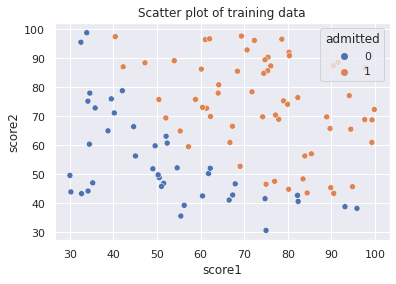

In [230]:
sns.set()
ax = sns.scatterplot(x='score1', y='score2', data=train_df, hue="admitted")
ax.set_title('Scatter plot of training data')


In [235]:
#Extract X and y 
y = train_df['admitted'].values
X = train_df.drop(columns = ['admitted']).values

In [248]:
#Perform the training
hist, acc = Training(X, y, 0.001, 100)

Loss: 4.0, Accuracy: 0.6
Loss: 4.0, Accuracy: 0.6
Loss: 4.0, Accuracy: 0.6
Loss: 4.966918846401042, Accuracy: 0.6
Loss: 5.442039202881698, Accuracy: 0.6
Loss: 1.5596298767838412, Accuracy: 0.64
Loss: 1.1283773782176507, Accuracy: 0.63
Loss: 0.997064928246985, Accuracy: 0.63
Loss: 0.8829529696442795, Accuracy: 0.63
Loss: 0.7905852543557775, Accuracy: 0.64
Loss: 0.722933953570381, Accuracy: 0.64
Loss: 0.6791155971829718, Accuracy: 0.65
Loss: 0.6540696737759869, Accuracy: 0.66
Loss: 0.64115799751315, Accuracy: 0.63
Loss: 0.6349576556871582, Accuracy: 0.62
Loss: 0.6321054400937939, Accuracy: 0.6
Loss: 0.6308250665029049, Accuracy: 0.6
Loss: 0.6302581070218011, Accuracy: 0.6
Loss: 0.6300089908091698, Accuracy: 0.6
Loss: 0.6299000234644934, Accuracy: 0.6


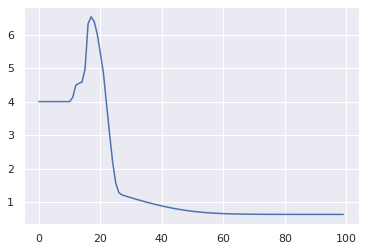

In [249]:
plt.plot(hist['loss'])